# Importar Librerias

In [1]:
from gurobipy import *
import networkx as nx
import matplotlib.pyplot as plt
import openpyxl 
import pandas as pd
import numpy as np

# Importación de Datos

In [2]:
# Datos del Sistema de 417 barras

# Datos globales
nref  = 1          # nodo de referencia
vref  = 1.0        # tensi�n en la subestaci�n (pu)
vbase = 10.0       # Tensi�n base (kV)
sbase = 100000     # Potencia base (kVA)
tol   = 10e-8      # Tolerancia del error permitido
vmin  = 0.93       # Tensi�n m�nima (pu)
vmax  = 1.05       # Tensi�n m�xima (pu)
delV=vmax-vmin

# Base de impedancia
zbase = 1000*((vbase**2)/sbase)

# Datos de ra[mas,
#       ,        desde    hacia       R](ohm)          X(ohm),
ramos = [        [384,       68,       0.0310675,       0.0214200],
                 [ 89,       67,       0.1078225,       0.0743400],
                 [225,      224,       0.0694450,       0.0478800],
                 [ 21,       72,       0.1937150,       0.1335600],
                 [ 66,      384,       0.0347225,       0.0239400],
                 [  3,       20,       0.6103850,       0.4208400],
                 [224,      222,       0.0694450,       0.0478800],
                 [ 72,       74,       0.0219300,       0.0151200],
                 [ 70,      382,       0.0310675,       0.0214200],
                 [ 20,       51,       0.0877200,       0.0604800],
                 [222,      221,       0.0877200,       0.0604800],
                 [ 76,       72,       0.0548250,       0.0378000],
                 [382,       66,       0.0328950,       0.0226800],
                 [ 51,       52,       0.0694450,       0.0478800],
                 [221,      220,       0.0840650,       0.0579600],
                 [ 75,       81,       0.0840650,       0.0579600],
                 [ 59,       70,       0.0537285,       0.0370440],
                 [ 52,       56,       0.1169600,       0.0806400],
                 [  1,      273,       0.0142545,       0.0098280],
                 [ 81,       76,       0.0529975,       0.0365400],
                 [ 68,       85,       0.0292400,       0.0201600],
                 [ 56,       27,       0.0950300,       0.0655200],
                 [  1,      274,       0.1154980,       0.0796320],
                 [ 74,       75,       0.1059950,       0.0730800],
                 [ 68,       93,       0.0840650,       0.0579600],
                 [ 27,       31,       0.1023400,       0.0705600],
                 [274,      275,       0.0836995,       0.0577080],
                 [ 72,       73,       0.0986850,       0.0680400],
                 [ 60,       58,       0.0109650,       0.0075600],
                 [ 31,       40,       0.1059950,       0.0730800],
                 [275,      209,       0.1396210,       0.0962640],
                 [ 73,       80,       0.0731000,       0.0504000],
                 [ 65,       71,       0.0712725,       0.0491400],
                 [ 40,       47,       0.0913750,       0.0630000],
                 [275,      276,       0.1158635,       0.0798840],
                 [ 73,       77,       0.0767550,       0.0529200],
                 [ 69,       65,       0.0310675,       0.0214200],
                 [ 51,       54,       0.0548250,       0.0378000],
                 [276,      264,       0.1151325,       0.0793800],
                 [ 77,       78,       0.0511700,       0.0352800],
                 [ 59,       69,       0.0211990,       0.0146160],
                 [ 54,       24,       0.0731000,       0.0504000],
                 [263,      264,       0.0687140,       0.0473760],
                 [ 79,       83,       0.2412300,       0.1663200],
                 [ 63,       61,       0.1096500,       0.0756000],
                 [ 24,       29,       0.0950300,       0.0655200],
                 [262,      263,       0.0630936,       0.0532656],
                 [ 82,       80,       0.0731000,       0.0504000],
                 [ 71,       63,       0.0226610,       0.0156240],
                 [ 29,       34,       0.1151325,       0.0793800],
                 [261,      262,       0.0379730,       0.0320580],
                 [ 78,       79,       0.0219300,       0.0151200],
                 [ 61,       60,       0.0438600,       0.0302400],
                 [ 34,       47,       0.1736125,       0.1197000],
                 [259,      261,       0.0511175,       0.0431550],
                 [ 83,       90,       0.1209805,       0.0834120],
                 [ 58,       62,       0.1293870,       0.0892080],
                 [ 47,       21,       0.0840650,       0.0579600],
                 [257,      259,       0.0687140,       0.0473760],
                 [ 77,       59,       0.3874300,       0.2671200],
                 [ 64,       67,       0.0449565,       0.0309960],
                 [ 20,       44,       0.0146200,       0.0100800],
                 [372,      239,       0.0265811,       0.0224406],
                 [123,        1,       0.0135240,       0.0159530],
                 [ 67,       68,       0.0862580,       0.0594720],
                 [ 44,       25,       0.1279250,       0.0882000],
                 [264,      265,       0.0723690,       0.0498960],
                 [120,       94,       0.2538284,       0.2584552],
                 [ 62,       64,       0.0603075,       0.0415800],
                 [ 25,       35,       0.1279250,       0.0882000],
                 [369,      347,       0.1315800,       0.0907200],
                 [120,      123,       0.2948750,       0.3002500],
                 [ 58,       20,       0.5921100,       0.4082400],
                 [ 35,       38,       0.0804100,       0.0554400],
                 [369,      370,       0.2083350,       0.1436400],
                 [114,      115,       0.0475150,       0.0327600],
                 [  1,       92,       0.3888920,       0.2681280],
                 [ 38,       41,       0.1041675,       0.0718200],
                 [370,      348,       0.1187875,       0.0819000],
                 [115,      112,       0.0402050,       0.0277200],
                 [ 92,        2,       0.3410115,       0.2351160],
                 [ 41,       43,       0.1169600,       0.0806400],
                 [383,      251,       0.0109650,       0.0075600],
                 [ 94,      113,       0.0328950,       0.0226800],
                 [ 92,       87,       0.0128524,       0.0108504],
                 [ 43,       48,       0.0804100,       0.0554400],
                 [383,      370,       0.0182750,       0.0126000],
                 [113,      114,       0.0767550,       0.0529200],
                 [  2,       17,       0.0877200,       0.0604800],
                 [ 48,       50,       0.0731000,       0.0504000],
                 [208,      277,       0.0672520,       0.0463680],
                 [106,       95,       0.0840650,       0.0579600],
                 [  6,        7,       0.0402050,       0.0277200],
                 [ 20,       33,       0.0657900,       0.0453600],
                 [277,      278,       0.0328950,       0.0226800],
                 [ 95,      112,       0.0328950,       0.0226800],
                 [  7,        3,       0.0519010,       0.0357840],
                 [ 84,       33,       0.0420325,       0.0289800],
                 [277,      279,       0.0482460,       0.0332640],
                 [ 94,      111,       0.0657900,       0.0453600],
                 [ 18,        5,       0.1224425,       0.0844200],
                 [ 28,       36,       0.0913750,       0.0630000],
                 [279,      280,       0.0343570,       0.0236880],
                 [111,      106,       0.0657900,       0.0453600],
                 [  5,        6,       0.0493425,       0.0340200],
                 [ 36,       45,       0.1315800,       0.0907200],
                 [280,      281,       0.0621350,       0.0428400],
                 [119,      121,       0.0102235,       0.0086310],
                 [ 17,       18,       0.1169600,       0.0806400],
                 [ 49,       45,       0.0438600,       0.0302400],
                 [281,      235,       0.0493425,       0.0340200],
                 [ 94,      119,       0.0560280,       0.0660910],
                 [  2,       14,       0.0164475,       0.0113400],
                 [ 55,       23,       0.0767550,       0.0529200],
                 [281,      282,       0.0537285,       0.0370440],
                 [118,       84,       0.0402050,       0.0277200],
                 [  8,        9,       0.0950300,       0.0655200],
                 [ 23,       28,       0.0694450,       0.0478800],
                 [235,      234,       0.0833340,       0.0574560],
                 [119,      122,       0.0511700,       0.0352800],
                 [  9,        3,       0.0146200,       0.0100800],
                 [ 33,       55,       0.0438600,       0.0302400],
                 [235,      236,       0.0420325,       0.0289800],
                 [122,      118,       0.2010250,       0.1386000],
                 [ 16,       19,       0.1571650,       0.1083600],
                 [ 21,       50,       0.0365500,       0.0252000],
                 [208,      236,       0.0767550,       0.0529200],
                 [104,      105,       0.0496570,       0.0419220],
                 [ 19,        8,       0.0219300,       0.0151200],
                 [ 32,       44,       0.2558500,       0.1764000],
                 [232,      349,       0.0759460,       0.0641160],
                 [ 84,      104,       0.0731000,       0.0504000],
                 [ 14,       16,       0.0986850,       0.0680400],
                 [ 37,       32,       0.1059950,       0.0730800],
                 [349,      207,       0.0321310,       0.0271260],
                 [105,      108,       0.0657900,       0.0453600],
                 [  2,       13,       0.0321310,       0.0271260],
                 [ 42,       37,       0.0676175,       0.0466200],
                 [380,      229,       0.0411861,       0.0347706],
                 [109,      108,       0.0496570,       0.0419220],
                 [  4,       12,       0.0671830,       0.0567180],
                 [ 46,       42,       0.0255850,       0.0176400],
                 [229,      228,       0.0630936,       0.0532656],
                 [ 84,      109,       0.0475150,       0.0327600],
                 [ 12,       15,       0.1051560,       0.0887760],
                 [ 46,       50,       0.0365500,       0.0252000],
                 [232,      231,       0.0968575,       0.0667800],
                 [110,       84,       0.0438600,       0.0302400],
                 [ 15,       11,       0.1329055,       0.1122030],
                 [ 21,       49,       0.1352350,       0.0932400],
                 [232,      293,       0.0749275,       0.0516600],
                 [103,      110,       0.0767550,       0.0529200],
                 [ 13,        4,       0.0452755,       0.0382230],
                 [ 39,       30,       0.1169600,       0.0806400],
                 [293,      236,       0.0694450,       0.0478800],
                 [107,      103,       0.0548250,       0.0378000],
                 [ 11,       86,       0.0350520,       0.0295920],
                 [ 49,       39,       0.0877200,       0.0604800],
                 [221,      344,       0.0292400,       0.0201600],
                 [ 84,      107,       0.0657900,       0.0453600],
                 [ 86,       91,       0.0950300,       0.0655200],
                 [ 53,       22,       0.0402050,       0.0277200],
                 [304,      306,       0.0694450,       0.0478800],
                 [ 97,      116,       0.0438600,       0.0302400],
                 [ 10,       11,       0.0467360,       0.0394560],
                 [ 30,       26,       0.0548250,       0.0378000],
                 [378,      377,       0.1114775,       0.0768600],
                 [ 84,       99,       0.1315800,       0.0907200],
                 [  3,       10,       0.1078225,       0.0743400],
                 [ 26,       53,       0.1005125,       0.0693000],
                 [304,      378,       0.0588455,       0.0405720],
                 [101,       96,       0.1059950,       0.0730800],
                 [ 10,       88,       0.1095375,       0.0924750],
                 [ 22,       33,       0.0438600,       0.0302400],
                 [309,      307,       0.0986850,       0.0680400],
                 [100,      101,       0.0584800,       0.0403200],
                 [ 88,       89,       0.0804100,       0.0554400],
                 [ 21,       57,       0.2156450,       0.1486800],
                 [314,      317,       0.0815065,       0.0561960],
                 [102,      100,       0.0548250,       0.0378000],
                 [ 99,      102,       0.0511700,       0.0352800],
                 [187,      167,       0.0847090,       0.0715140],
                 [314,      318,       0.0723690,       0.0498960],
                 [138,      194,       0.0127925,       0.0088200],
                 [ 96,      117,       0.0785825,       0.0541800],
                 [167,      175,       0.0905510,       0.0764460],
                 [301,      305,       0.0438600,       0.0302400],
                 [155,      151,       0.0694450,       0.0478800],
                 [117,       97,       0.0402050,       0.0277200],
                 [175,      181,       0.0847090,       0.0715140],
                 [310,      315,       0.0614040,       0.0423360],
                 [126,      124,       0.0292400,       0.0201600],
                 [ 98,       94,       0.0402050,       0.0277200],
                 [160,      180,       0.0438600,       0.0302400],
                 [310,      305,       0.0826030,       0.0569520],
                 [  1,      351,       0.2266100,       0.1562400],
                 [116,       98,       0.0621350,       0.0428400],
                 [180,      177,       0.0548250,       0.0378000],
                 [129,      346,       0.2616980,       0.1804320],
                 [  1,      350,       0.2266100,       0.1562400],
                 [ 57,      147,       0.1571650,       0.1083600],
                 [169,      162,       0.0767550,       0.0529200],
                 [ 90,      370,       0.1578960,       0.1088640],
                 [350,      203,       0.0233920,       0.0161280],
                 [153,      141,       0.0730250,       0.0616500],
                 [162,      183,       0.0840650,       0.0579600],
                 [382,      383,       0.1502205,       0.1035720],
                 [351,      379,       0.0233920,       0.0161280],
                 [147,      142,       0.1059950,       0.0730800],
                 [183,      182,       0.0328950,       0.0226800],
                 [ 66,      252,       0.1929840,       0.1330560],
                 [203,      204,       0.0511175,       0.0431550],
                 [142,      136,       0.0804100,       0.0554400],
                 [160,      181,       0.0913750,       0.0630000],
                 [384,      243,       0.2273410,       0.1567440],
                 [204,      205,       0.0621350,       0.0428400],
                 [132,      153,       0.0877200,       0.0604800],
                 [181,      178,       0.0584800,       0.0403200],
                 [ 85,      244,       0.1399865,       0.0965160],
                 [203,      206,       0.1034034,       0.0872964],
                 [136,      132,       0.1498550,       0.1033200],
                 [171,      163,       0.0642620,       0.0542520],
                 [352,      414,       0.0705415,       0.0486360],
                 [379,      380,       0.1034034,       0.0872964],
                 [ 57,      149,       0.0694450,       0.0478800],
                 [163,      184,       0.0759460,       0.0641160],
                 [414,      385,       0.0720035,       0.0496440],
                 [206,      207,       0.0598805,       0.0505530],
                 [ 57,      125,       0.0913750,       0.0630000],
                 [160,      129,       0.2278380,       0.1923480],
                 [414,      401,       0.0727345,       0.0501480],
                 [  1,      375,       0.0109650,       0.0075600],
                 [127,      124,       0.0292400,       0.0201600],
                 [129,      141,       0.0321310,       0.0271260],
                 [401,      386,       0.0592110,       0.0408240],
                 [208,      209,       0.0383775,       0.0264600],
                 [128,      127,       0.2704700,       0.1864800],
                 [131,      157,       0.0365500,       0.0252000],
                 [401,      402,       0.0709070,       0.0488880],
                 [209,      210,       0.1169600,       0.0806400],
                 [125,      128,       0.0219300,       0.0151200],
                 [130,      131,       0.0548250,       0.0378000],
                 [402,      387,       0.0566525,       0.0390600],
                 [209,      211,       0.0559215,       0.0385560],
                 [200,      119,       0.0767550,       0.0529200],
                 [141,      130,       0.0467360,       0.0394560],
                 [402,      403,       0.0595765,       0.0410760],
                 [211,        1,       0.0562870,       0.0388080],
                 [200,      201,       0.0073100,       0.0050400],
                 [157,      133,       0.1133050,       0.0781200],
                 [403,      388,       0.0833340,       0.0574560],
                 [375,      202,       0.1498550,       0.1033200],
                 [158,      200,       0.0219300,       0.0151200],
                 [133,      140,       0.1059950,       0.0730800],
                 [403,      404,       0.0683485,       0.0471240],
                 [202,        1,       0.4824600,       0.3326400],
                 [124,      158,       0.1023400,       0.0705600],
                 [140,      147,       0.1535100,       0.1058400],
                 [368,      345,       0.1151325,       0.0793800],
                 [373,      352,       0.1041675,       0.0718200],
                 [199,      192,       0.0146200,       0.0100800],
                 [129,      154,       0.0350520,       0.0295920],
                 [345,      346,       0.0584800,       0.0403200],
                 [352,      212,       0.1136705,       0.0783720],
                 [199,      197,       0.0694450,       0.0478800],
                 [137,      144,       0.0950300,       0.0655200],
                 [345,      369,       0.0529975,       0.0365400],
                 [352,      353,       0.2138175,       0.1474200],
                 [159,      199,       0.2704700,       0.1864800],
                 [144,      148,       0.0950300,       0.0655200],
                 [400,      404,       0.0475150,       0.0327600],
                 [353,      213,       0.2010250,       0.1386000],
                 [197,      191,       0.0109650,       0.0075600],
                 [154,      156,       0.0321310,       0.0271260],
                 [404,      405,       0.0402050,       0.0277200],
                 [353,      214,       0.0500735,       0.0345240],
                 [159,      190,       0.2359000,       0.2402000],
                 [156,      137,       0.0840650,       0.0579600],
                 [405,      389,       0.0588455,       0.0405720],
                 [  1,      215,       0.3475905,       0.2396520],
                 [159,      161,       0.0840650,       0.0579600],
                 [143,      150,       0.0986850,       0.0680400],
                 [405,      406,       0.0716380,       0.0493920],
                 [215,      216,       0.1059950,       0.0730800],
                 [161,      172,       0.0877200,       0.0604800],
                 [150,      148,       0.0219300,       0.0151200],
                 [406,      390,       0.0453220,       0.0312480],
                 [216,      217,       0.0993140,       0.0838440],
                 [172,      188,       0.0913750,       0.0630000],
                 [134,      139,       0.1197610,       0.1011060],
                 [406,      391,       0.0731000,       0.0504000],
                 [216,      218,       0.0657900,       0.0453600],
                 [188,      168,       0.0913750,       0.0630000],
                 [139,      143,       0.0621350,       0.0428400],
                 [404,      407,       0.0833340,       0.0574560],
                 [218,      219,       0.0029240,       0.0020160],
                 [176,      179,       0.0657900,       0.0453600],
                 [154,      134,       0.0788670,       0.0665820],
                 [407,      392,       0.0785825,       0.0541800],
                 [219,      220,       0.0804100,       0.0554400],
                 [168,      176,       0.1133050,       0.0781200],
                 [148,       57,       0.1462000,       0.1008000],
                 [407,      408,       0.0489770,       0.0337680],
                 [220,      223,       0.0709803,       0.0599238],
                 [161,      185,       0.1315800,       0.0907200],
                 [129,      151,       0.0328950,       0.0226800],
                 [408,      409,       0.0668865,       0.0461160],
                 [223,      237,       0.0817880,       0.0690480],
                 [185,      164,       0.0913750,       0.0630000],
                 [145,      146,       0.0328950,       0.0226800],
                 [409,      393,       0.0738310,       0.0509040],
                 [237,      238,       0.0622173,       0.0525258],
                 [164,      165,       0.0328950,       0.0226800],
                 [146,      149,       0.0548250,       0.0378000],
                 [409,      394,       0.0690795,       0.0476280],
                 [237,      372,       0.0537464,       0.0453744],
                 [165,      173,       0.1388900,       0.0957600],
                 [152,      135,       0.0767550,       0.0529200],
                 [408,      410,       0.0551905,       0.0380520],
                 [239,      240,       0.0058420,       0.0049320],
                 [173,      179,       0.1133050,       0.0781200],
                 [135,      145,       0.1425450,       0.0982800],
                 [410,      415,       0.0657900,       0.0453600],
                 [239,      243,       0.0835406,       0.0705276],
                 [179,      160,       0.0694450,       0.0478800],
                 [135,      195,       0.0091375,       0.0063000],
                 [410,      411,       0.0643280,       0.0443520],
                 [243,      355,       0.0054825,       0.0037800],
                 [159,      182,       0.0540960,       0.0638120],
                 [151,      152,       0.0548250,       0.0378000],
                 [411,      395,       0.0595765,       0.0410760],
                 [355,      354,       0.1279250,       0.0882000],
                 [182,      186,       0.0483000,       0.0569750],
                 [  1,      190,       0.1415400,       0.1441200],
                 [411,      412,       0.0676175,       0.0466200],
                 [354,      242,       0.0182750,       0.0126000],
                 [186,      166,       0.0377440,       0.0384320],
                 [190,      189,       0.0731000,       0.0504000],
                 [412,      399,       0.0566525,       0.0390600],
                 [354,      241,       0.0731000,       0.0504000],
                 [166,      170,       0.0377440,       0.0384320],
                 [189,      198,       0.1096500,       0.0756000],
                 [412,      398,       0.0716380,       0.0493920],
                 [243,      356,       0.0091375,       0.0063000],
                 [170,      174,       0.0292100,       0.0246600],
                 [198,      196,       0.0365500,       0.0252000],
                 [412,      413,       0.0873545,       0.0602280],
                 [356,      357,       0.0511700,       0.0352800],
                 [174,      180,       0.0636930,       0.0648540],
                 [189,      193,       0.0233920,       0.0161280],
                 [413,      397,       0.0705415,       0.0486360],
                 [357,      244,       0.0127925,       0.0088200],
                 [159,      184,       0.2266100,       0.1562400],
                 [149,      138,       0.1279250,       0.0882000],
                 [413,      396,       0.0694450,       0.0478800],
                 [357,      245,       0.0054825,       0.0037800],
                 [184,      187,       0.0350520,       0.0295920],
                 [138,      155,       0.1059950,       0.0730800],
                 [290,      289,       0.0628660,       0.0433440],
                 [243,      246,       0.0365125,       0.0308250],
                 [246,      247,       0.0526320,       0.0362880],
                 [265,      266,       0.1078225,       0.0743400],
                 [289,      288,       0.0467840,       0.0322560],
                 [306,      310,       0.1264630,       0.0871920],
                 [247,      248,       0.0727345,       0.0501480],
                 [266,      267,       0.0994160,       0.0685440],
                 [288,      300,       0.1867705,       0.1287720],
                 [310,      320,       0.0127925,       0.0088200],
                 [243,      249,       0.0487807,       0.0411822],
                 [267,      268,       0.1564340,       0.1078560],
                 [300,      286,       0.1096500,       0.0756000],
                 [310,      314,       0.0723690,       0.0498960],
                 [249,      358,       0.0431290,       0.0297360],
                 [268,      269,       0.0549647,       0.0559666],
                 [  1,      373,       0.0277780,       0.0191520],
                 [314,      309,       0.0698105,       0.0481320],
                 [358,      359,       0.0054825,       0.0037800],
                 [269,      365,       0.0707700,       0.0720600],
                 [300,      285,       0.0811410,       0.0559440],
                 [309,      313,       0.0785825,       0.0541800],
                 [359,      250,       0.0201025,       0.0138600],
                 [365,      366,       0.0255850,       0.0176400],
                 [300,      301,       0.0932025,       0.0642600],
                 [313,      317,       0.0683485,       0.0471240],
                 [359,      251,       0.1407175,       0.0970200],
                 [366,      270,       0.1005125,       0.0693000],
                 [301,      302,       0.0555560,       0.0383040],
                 [317,      319,       0.1235390,       0.0851760],
                 [251,      252,       0.1882325,       0.1297800],
                 [366,      271,       0.0164475,       0.0113400],
                 [302,      303,       0.0453220,       0.0312480],
                 [319,      318,       0.0665210,       0.0458640],
                 [251,      360,       0.0986850,       0.0680400],
                 [365,      363,       0.0483595,       0.0492410],
                 [303,      304,       0.1951770,       0.1345680],
                 [318,      315,       0.0694450,       0.0478800],
                 [360,      253,       0.0497080,       0.0342720],
                 [363,      362,       0.0188720,       0.0192160],
                 [304,      305,       0.2083350,       0.1436400],
                 [315,      311,       0.0833340,       0.0574560],
                 [253,      254,       0.0458597,       0.0387162],
                 [363,      381,       0.2631600,       0.1814400],
                 [305,      308,       0.0504390,       0.0347760],
                 [311,      304,       0.1052640,       0.0725760],
                 [254,      361,       0.0588455,       0.0405720],
                 [362,      272,       0.0164475,       0.0113400],
                 [308,      316,       0.2218585,       0.1529640],
                 [296,      260,       0.0478805,       0.0330120],
                 [361,      256,       0.0402050,       0.0277200],
                 [362,        1,       0.0241500,       0.0284875],
                 [316,      312,       0.1052640,       0.0725760],
                 [260,      287,       0.0358190,       0.0246960],
                 [254,      255,       0.0274125,       0.0189000],
                 [  1,      364,       0.2850900,       0.1965600],
                 [312,      307,       0.0723690,       0.0498960],
                 [260,      324,       0.1078225,       0.0743400],
                 [254,      257,       0.0788670,       0.0665820],
                 [364,      284,       0.1041675,       0.0718200],
                 [307,      300,       0.0782170,       0.0539280],
                 [324,      326,       0.0054825,       0.0037800],
                 [257,      258,       0.1059950,       0.0730800],
                 [364,      285,       0.0584800,       0.0403200],
                 [334,      336,       0.0712725,       0.0491400],
                 [324,      266,       0.1038020,       0.0715680],
                 [257,      283,       0.0537464,       0.0453744],
                 [381,      268,       0.3095785,       0.2134440],
                 [336,      323,       0.0548250,       0.0378000],
                 [324,      325,       0.0482460,       0.0332640],
                 [283,      282,       0.0663067,       0.0559782],
                 [268,      327,       0.0383775,       0.0264600],
                 [336,      337,       0.0646935,       0.0446040],
                 [324,      323,       0.0877200,       0.0604800],
                 [282,      234,       0.0554990,       0.0468540],
                 [327,      328,       0.0548250,       0.0378000],
                 [337,      338,       0.0292400,       0.0201600],
                 [323,      322,       0.0676175,       0.0466200],
                 [234,      233,       0.0277495,       0.0234270],
                 [268,      297,       0.0504390,       0.0347760],
                 [338,      339,       0.0420325,       0.0289800],
                 [322,      321,       0.0950300,       0.0655200],
                 [233,      376,       0.0116840,       0.0098640],
                 [297,      296,       0.0504390,       0.0347760],
                 [339,      265,       0.0679830,       0.0468720],
                 [321,      299,       0.0701760,       0.0483840],
                 [230,      231,       0.0455676,       0.0384696],
                 [296,      295,       0.0741965,       0.0511560],
                 [265,      367,       0.0087720,       0.0060480],
                 [299,      296,       0.0380120,       0.0262080],
                 [230,      228,       0.0262890,       0.0221940],
                 [296,      298,       0.0376465,       0.0259560],
                 [367,      340,       0.0010965,       0.0007560],
                 [322,      329,       0.0314330,       0.0216720],
                 [228,      371,       0.0467360,       0.0394560],
                 [295,      294,       0.0226610,       0.0156240],
                 [340,      341,       0.0274125,       0.0189000],
                 [329,      330,       0.0266815,       0.0183960],
                 [371,      374,       0.0394335,       0.0332910],
                 [294,      292,       0.0917405,       0.0632520],
                 [341,      342,       0.1133050,       0.0781200],
                 [330,      331,       0.0416670,       0.0287280],
                 [374,      227,       0.0036550,       0.0025200],
                 [268,      292,       0.0986850,       0.0680400],
                 [334,      335,       0.0559215,       0.0385560],
                 [331,      332,       0.0274125,       0.0189000],
                 [374,      226,       0.0023368,       0.0019728],
                 [292,      290,       0.0168130,       0.0115920],
                 [341,      368,       0.1790950,       0.1234800],
                 [329,      333,       0.0584800,       0.0403200],
                 [226,      225,       0.0274125,       0.0189000],
                 [290,      291,       0.0054825,       0.0037800],
                 [376,      230,       0.0277495,       0.0234270],
                 [333,      334,       0.0416670,       0.0287280],
                 [368,      343,       0.0091375,       0.0063000]]

# Demanda de pot[enci,a ac,tiva ,y rea],ctiva en las barras
#             ba[rra ,    ,     ,Pd(kW],)   Qd(kW) Qbc(kW)
barras = [    [  1	,0.1	,0    , 0.00],
              [  2	,0.1	,0    , 0.00],
              [  3	,122	,59   , 0.00],
              [  4	,0.1	,0    , 0.00],
              [  5	,0.1	,0    , 0.00],
              [  6	,114	,55   , 0.00],
             [   7,	51	,25   , 0.00],
             [   8,	83	,40   , 0.00],
              [  9	,0.1	,0    , 0.00],
               [ 10	,122	,59   , 0.00],
               [ 11	,122	,59   , 0.00],
              [  12,	77	,37   , 0.00],
               [ 13	,0.1	,0    , 0.00],
              [  14,	68	,33   , 0.00],
              [  15,	71	,34   , 0.00],
               [ 16	,0.1	,0    , 0.00],
               [ 17	,0.1	,0    , 0.00],
              [  18,	77	,37   , 0.00],
              [  19,	30	,14   , 0.00],
              [  20,	13	,6    , 0.00],
             [   21, 	1	,0    , 0.00],
               [ 22	,194	,94   , 0.00],
              [  23,	77	,37   , 0.00],
              [  24,	77	,37   , 0.00],
              [  25,	77	,37   , 0.00],
               [ 26	,122	,59   , 0.00],
               [ 27	,104	,51   , 0.00],
               [ 28	,0.1	,0    , 0.00],
              [  29,	77	,37   , 0.00],
               [ 30	,243	,118  , 0.00],
              [  31,	77	,37   , 0.00],
              [  32,	77	,37   , 0.00],
               [ 33	,0.1	,0    , 0.00],
               [ 34	,121	,58   , 0.00],
               [ 35	,194	,94   , 0.00],
               [ 36	,122	,59   , 0.00],
              [  37,	77	,37   , 0.00],
               [ 38	,0.1	,0    , 0.00],
               [ 39	,0.1	,0    , 0.00],
              [  40,	96	,47   , 0.00],
               [ 41	,122	,59   , 0.00],
              [  42,	70	,34   , 0.00],
              [  43,	58	,28   , 0.00],
               [ 44	,0.1	,0    , 0.00],
               [ 45	,122	,59   , 0.00],
               [ 46	,122	,59   , 0.00],
               [ 47	,122	,59   , 0.00],
              [  48,	86	,42   , 0.00],
              [  49,	77	,37   , 0.00],
               [ 50	,0.1	,0    , 0.00],
               [ 51	,122	,59   , 0.00],
               [ 52	,122	,59   , 0.00],
               [ 53	,122	,59   , 0.00],
               [ 54	,0.1	,0    , 0.00],
              [  55,	42	,20   , 0.00],
               [ 56	,122	,59   , 0.00],
              [  57,	13	,6    , 0.00],
              [  58,	77	,37   , 0.00],
              [  59,	50	,24   , 0.00],
               [ 60	,0.1	,0    , 0.00],
              [  61,	60	,29   , 0.00],
              [  62,	71	,34   , 0.00],
               [ 63	,122	,59   , 0.00],
              [  64,	77	,37   , 0.00],
              [  65,	95	,46   , 0.00],
               [ 66	,121	,58   , 0.00],
              [  67,	77	,37   , 0.00],
               [ 68	,103	,50   , 0.00],
              [  69,	52	,25   , 0.00],
              [  70,	57	,27   , 0.00],
               [ 71	,171	,83   , 0.00],
               [ 72	,121	,58   , 0.00],
              [  73,	39	,19   , 0.00],
               [ 74	,119	,58   , 0.00],
              [  75,	49	,24   , 0.00],
               [ 76	,0.1	,0    , 0.00],
              [  77,	50	,24   , 0.00],
              [  78,	44	,21   , 0.00],
              [  79,	82	,40   , 0.00],
               [ 80	,132	,64   , 0.00],
               [ 81	,194	,94   , 0.00],
               [ 82	,0.1	,0    , 0.00],
               [ 83	,122	,59   , 0.00],
             [   84,	3	,1    , 0.00],
              [  85,	52	,25   , 0.00],
               [ 86	,103	,50   , 0.00],
              [  87,	21	,10   , 0.00],
              [  88,	21	,10   , 0.00],
              [  89,	21	,10   , 0.00],
             [   90,	5	,3    , 0.00],
               [ 91	,0.1	,0    , 0.00],
               [ 92	,0.1	,0    , 0.00],
              [  93,	21	,10   , 0.00],
              [  94,	18	,9    , 0.00],
               [ 95	,122	,59   , 0.00],
               [ 96	,116	,56   , 0.00],
             [   97,	7	,3    , 0.00],
              [  98,	64	,31   , 0.00],
              [  99,	49	,24   , 0.00],
               [ 100,	16	,8    , 0.00],
               [ 101,	77	,37   , 0.00],
                [102	,119	,58   , 0.00],
               [ 103,	71	,34   , 0.00],
               [ 104,	77	,37   , 0.00],
                [105	,194	,94   , 0.00],
                [106	,122	,59   , 0.00],
               [ 107,	55	,27   , 0.00],
               [ 108,	38	,18   , 0.00],
               [ 109,	22	,10   , 0.00],
                [110	,0.1	,0    , 0.00],
               [ 111,	77	,37   , 0.00],
                [112	,122	,59   , 0.00],
               [ 113,	38	,18   , 0.00],
                [114	,122	,59   , 0.00],
               [ 115,	27	,13   , 0.00],
               [ 116,	64	,31   , 0.00],
                [117	,0.1	,0    , 0.00],
                [118	,0.1	,0    , 0.00],
                [119	,0.1	,0    , 0.00],
                [120	,0.1	,0    , 0.00],
               [ 121,	79	,38   , 0.00],
                [122	,247	,119  , 0.00],
                [123	,0.1	,0    , 0.00],
                [124	,0.1	,0    , 0.00],
                [125	,0.1	,0    , 0.00],
                [126	,0.1	,0    , 0.00],
                [127	,0.1	,0    , 0.00],
                [128	,0.1	,0    , 0.00],
               [ 129,	77	,37   , 0.00],
                [130	,122	,59   , 0.00],
               [ 131,	62	,30   , 0.00],
                [132	,105	,51   , 0.00],
                [133	,122	,59   , 0.00],
               [ 134,	77	,37   , 0.00],
               [ 135,	77	,37   , 0.00],
                [136	,0.1	,0    , 0.00],
               [ 137,	85	,41   , 0.00],
              [  138,	8	,4    , 0.00],
                [139	,122	,59   , 0.00],
               [ 140,	35	,17   , 0.00],
               [ 141,	55	,27   , 0.00],
                [142	,153	,74   , 0.00],
                [143	,316	,153  , 0.00],
                [144	,105	,51   , 0.00],
               [ 145,	20	,10   , 0.00],
               [ 146,	95	,46   , 0.00],
               [ 147,	38	,18   , 0.00],
               [ 148,	83	,40   , 0.00],
               [ 149,	50	,24   , 0.00],
               [ 150,	77	,37   , 0.00],
                [151	,122	,59   , 0.00],
                [152	,102	,49   , 0.00],
               [ 153,	60	,29   , 0.00],
               [ 154,	77	,37   , 0.00],
                [155	,194	,94   , 0.00],
               [ 156,	56	,27   , 0.00],
                [157	,122	,59   , 0.00],
                [158	,0.1	,0    , 0.00],
              [  159,	3	,1    , 0.00],
              [  160,	1	,0    , 0.00],
               [ 161,	52	,25   , 0.00],
                [162	,194	,94   , 0.00],
               [ 163,	10	,5    , 0.00],
                [164	,128	,62   , 0.00],
               [ 165,	16	,8    , 0.00],
               [ 166,	37	,18   , 0.00],
                [167	,154	,75   , 0.00],
                [168	,0.1	,0    , 0.00],
                [169	,0.1	,0    , 0.00],
               [ 170,	78	,38   , 0.00],
                [171	,0.1	,0    , 0.00],
               [ 172,	27	,13   , 0.00],
                [173	,103	,50   , 0.00],
                [174	,122	,59   , 0.00],
               [ 175,	72	,35   , 0.00],
                [176	,0.1	,0    , 0.00],
                [177	,122	,59   , 0.00],
                [178	,194	,94   , 0.00],
                [179	,0.1	,0    , 0.00],
               [ 180,	77	,37   , 0.00],
               [ 181,	82	,40   , 0.00],
               [ 182,	53	,26   , 0.00],
                [183	,122	,59   , 0.00],
               [ 184,	64	,31   , 0.00],
               [ 185,	86	,42   , 0.00],
               [ 186,	82	,40   , 0.00],
                [187	,0.1	,0    , 0.00],
                [188	,167	,81   , 0.00],
                [189	,0.1	,0    , 0.00],
                [190	,0.1	,0    , 0.00],
                [191	,131	,64   , 0.00],
               [ 192,	21	,10   , 0.00],
               [ 193,	21	,10   , 0.00],
               [ 194,	21	,10   , 0.00],
               [ 195,	21	,10   , 0.00],
                [196	,0.1	,0    , 0.00],
                [197	,0.1	,0    , 0.00],
                [198	,0.1	,0    , 0.00],
                [199	,0.1	,0    , 0.00],
                [200	,0.1	,0    , 0.00],
               [ 201,	52	,25   , 0.00],
                [202	,202	,98   , 0.00],
                [203	,202	,98   , 0.00],
               [ 204,	73	,35   , 0.00],
               [ 205,	81	,39   , 0.00],
                [206	,115	,56   , 0.00],
                [207	,118	,57   , 0.00],
                [208	,318	,154  , 0.00],
                [209	,161	,78   , 0.00],
                [210	,126	,61   , 0.00],
               [ 211,	59	,29   , 0.00],
               [ 212,	24	,12   , 0.00],
               [ 213,	24	,12   , 0.00],
              [  214,	5	,2    , 0.00],
                [215	,126	,61   , 0.00],
               [ 216,	56	,27   , 0.00],
               [ 217,	62	,30   , 0.00],
                [218	,0.1	,0    , 0.00],
               [ 219,	32	,15   , 0.00],
                [220	,158	,77   , 0.00],
                [221	,126	,61   , 0.00],
                [222	,202	,98   , 0.00],
               [ 223,	41	,20   , 0.00],
               [ 224,	81	,39   , 0.00],
                [225	,126	,61   , 0.00],
                [226	,202	,98   , 0.00],
               [ 227,	18	,9    , 0.00],
                [228	,202	,98   , 0.00],
                [229	,106	,51   , 0.00],
                [230	,175	,85   , 0.00],
                [231	,174	,84   , 0.00],
                [232	,113	,55   , 0.00],
                [233	,202	,98   , 0.00],
                [234	,0.1	,0    , 0.00],
                [235	,202	,98   , 0.00],
                [236	,403	,195  , 0.00],
                [237	,202	,98   , 0.00],
                [238	,126	,61   , 0.00],
                [239	,0.1	,0    , 0.00],
               [ 240,	29	,14   , 0.00],
              [  241,	9	,4    , 0.00],
              [  242,	5	,2    , 0.00],
                [243	,0.1	,0    , 0.00],
               [ 244,	18	,9    , 0.00],
               [ 245,	45	,22   , 0.00],
               [ 246,	32	,16   , 0.00],
               [ 247,	61	,30   , 0.00],
               [ 248,	81	,39   , 0.00],
                [249	,126	,61   , 0.00],
               [ 250,	23	,11   , 0.00],
               [ 251,	14	,7    , 0.00],
               [ 252,	18	,9    , 0.00],
                [253	,126	,61   , 0.00],
              [  254,	5	,3    , 0.00],
               [ 255,	26	,13   , 0.00],
               [ 256,	18	,9    , 0.00],
                [257	,126	,61   , 0.00],
               [ 258,	81	,39   , 0.00],
                [259	,0.1	,0    , 0.00],
                [260	,126	,61   , 0.00],
               [ 261,	41	,20   , 0.00],
                [262	,0.1	,0    , 0.00],
               [ 263,	28	,14   , 0.00],
               [ 264,	30	,14   , 0.00],
               [ 265,	81	,39   , 0.00],
                [266	,202	,98   , 0.00],
                [267	,318	,154  , 0.00],
                [268	,176	,85   , 0.00],
                [269	,126	,61   , 0.00],
              [  270,	6	,3    , 0.00],
               [ 271,	31	,15   , 0.00],
               [ 272,	60	,29   , 0.00],
               [ 273,	56	,27   , 0.00],
                [274	,126	,61   , 0.00],
                [275	,118	,57   , 0.00],
                [276	,126	,61   , 0.00],
                [277	,202	,98   , 0.00],
               [ 278,	10	,5    , 0.00],
                [279	,126	,61   , 0.00],
                [280	,202	,98   , 0.00],
                [281	,318	,154  , 0.00],
               [ 282,	82	,40   , 0.00],
                [283	,126	,61   , 0.00],
               [ 284,	22	,10   , 0.00],
               [ 285,	13	,6    , 0.00],
               [ 286,	71	,34   , 0.00],
                [287	,101	,49   , 0.00],
                [288	,113	,54   , 0.00],
                [289	,126	,61   , 0.00],
                [290	,0.1	,0    , 0.00],
               [ 291,	34	,17   , 0.00],
               [ 292,	83	,40   , 0.00],
               [ 293,	59	,29   , 0.00],
                [294	,126	,61   , 0.00],
                [295	,145	,70   , 0.00],
                [296	,202	,98   , 0.00],
               [ 297,	50	,24   , 0.00],
               [ 298,	41	,20   , 0.00],
                [299	,202	,98   , 0.00],
               [ 300,	77	,37   , 0.00],
                [301	,161	,78   , 0.00],
                [302	,477	,231  , 0.00],
               [ 303,	68	,33   , 0.00],
               [ 304,	14	,7    , 0.00],
              [  305,	4	,2    , 0.00],
                [306	,0.1	,0    , 0.00],
               [ 307,	66	,32   , 0.00],
                [308	,0.1	,0    , 0.00],
               [ 309,	60	,29   , 0.00],
               [ 310,	95	,46   , 0.00],
                [311	,0.1	,0    , 0.00],
               [ 312,	19	,9    , 0.00],
               [ 313,	67	,32   , 0.00],
               [ 314,	18	,9    , 0.00],
               [ 315,	33	,16   , 0.00],
               [ 316,	21	,10   , 0.00],
               [ 317,	33	,16   , 0.00],
               [ 318,	42	,20   , 0.00],
               [ 319,	52	,25   , 0.00],
               [ 320,	43	,21   , 0.00],
                [321	,126	,61   , 0.00],
                [322	,107	,52   , 0.00],
                [323	,202	,98   , 0.00],
                [324	,126	,61   , 0.00],
               [ 325,	24	,12   , 0.00],
                [326	,101	,49   , 0.00],
               [ 327,	81	,39   , 0.00],
                [328	,155	,75   , 0.00],
               [ 329,	23	,11   , 0.00],
               [ 330,	31	,15   , 0.00],
                [331	,126	,61   , 0.00],
               [ 332,	13	,6    , 0.00],
               [ 333,	56	,27   , 0.00],
                [334	,120	,58   , 0.00],
                [335	,126	,61   , 0.00],
                [336	,403	,195  , 0.00],
               [ 337,	81	,39   , 0.00],
                [338	,177	,86   , 0.00],
                [339	,151	,73   , 0.00],
              [  340,	9	,4    , 0.00],
               [ 341,	29	,14   , 0.00],
               [ 342,	14	,7    , 0.00],
               [ 343,	23	,11   , 0.00],
               [ 344,	45	,22   , 0.00],
                [345	,0.1	,0    , 0.00],
               [ 346,	36	,17   , 0.00],
              [  347,	5	,2    , 0.00],
              [  348,	9	,4    , 0.00],
               [ 349,	80	,39   , 0.00],
                [350	,0.1	,0    , 0.00],
                [351	,0.1	,0    , 0.00],
                [352	,0.1	,0    , 0.00],
                [353	,0.1	,0    , 0.00],
                [354	,0.1	,0    , 0.00],
                [355	,0.1	,0    , 0.00],
                [356	,0.1	,0    , 0.00],
                [357	,0.1	,0    , 0.00],
                [358	,0.1	,0    , 0.00],
                [359	,0.1	,0    , 0.00],
                [360	,0.1	,0    , 0.00],
                [361	,0.1	,0    , 0.00],
                [362	,0.1	,0    , 0.00],
                [363	,0.1	,0    , 0.00],
                [364	,0.1	,0    , 0.00],
                [365	,0.1	,0    , 0.00],
                [366	,0.1	,0    , 0.00],
                [367	,0.1	,0    , 0.00],
                [368	,0.1	,0    , 0.00],
                [369	,0.1	,0    , 0.00],
                [370	,0.1	,0    , 0.00],
                [371	,0.1	,0    , 0.00],
                [372	,0.1	,0    , 0.00],
                [373	,0.1	,0    , 0.00],
                [374	,0.1	,0    , 0.00],
                [375	,0.1	,0    , 0.00],
                [376	,0.1	,0    , 0.00],
               [ 377,	86	,41   , 0.00],
               [ 378,	86	,41   , 0.00],
                [379	,0.1	,0    , 0.00],
                [380	,0.1	,0    , 0.00],
                [381	,0.1	,0    , 0.00],
                [382	,0.1	,0    , 0.00],
                [383	,0.1	,0    , 0.00],
                [384	,0.1	,0    , 0.00],
               [ 385,	68	,33   , 0.00],
               [ 386,	15	,7    , 0.00],
               [ 387,	56	,27   , 0.00],
               [ 388,	12	,6    , 0.00],
               [ 389,	50	,24   , 0.00],
                [390	,115	,56   , 0.00],
               [ 391,	14	,7    , 0.00],
              [  392,	5	,2    , 0.00],
               [ 393,	19	,9    , 0.00],
               [ 394,	34	,17   , 0.00],
               [ 395,	10	,5    , 0.00],
               [ 396,	40	,19   , 0.00],
               [ 397,	28	,14   , 0.00],
               [ 398,	14	,7    , 0.00],
               [ 399,	17	,8    , 0.00],
               [ 400,	41	,20   , 0.00],
                [401	,0.1	,0    , 0.00],
                [402	,0.1	,0    , 0.00],
                [403	,0.1	,0    , 0.00],
                [404	,0.1	,0    , 0.00],
                [405	,0.1	,0    , 0.00],
                [406	,0.1	,0    , 0.00],
                [407	,0.1	,0    , 0.00],
                [408	,0.1	,0    , 0.00],
                [409	,0.1	,0    , 0.00],
                [410	,0.1	,0    , 0.00],
                [411	,0.1	,0    , 0.00],
                [412	,0.1	,0    , 0.00],
                [413	,0.1	,0    , 0.00],
                [414	,0.1	,0    , 0.00],
                [ 415,	19	,    9 ,    0.00] 
]

# Conjuntos y Parámetros

In [19]:
# Nodos
N = list(range(1,len(barras)+1))

# Arcos
B = [(ramos[i][0],ramos[i][1]) for i in range(len(ramos))]+[(ramos[i][1],ramos[i][0]) for i in range(len(ramos))]


D=[nref]

# =============================
# PARAMETROS
# =============================

r={}
x={}
for i in ramos:
    r[(i[0],i[1])]=i[2]/zbase
    r[(i[1],i[0])]=i[2]/zbase
    x[(i[0],i[1])]=i[3]/zbase
    x[(i[1],i[0])]=i[3]/zbase
    
pd={}
qd={}
for i in barras:
    pd[i[0]]=i[1]/sbase
    qd[i[0]]=i[2]/sbase

        
bv=0.1

# Grafo

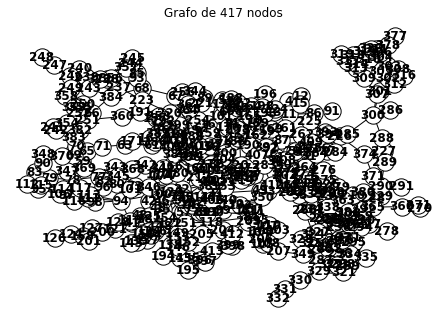

<Figure size 14400x12960 with 0 Axes>

In [13]:
grafo=[]

G = nx.Graph()

G.add_nodes_from(N)

G.add_edges_from(B)
nx.draw(G, with_labels=True, node_color="white", font_weight='bold', edgecolors='black')
plt.title("Grafo de 417 nodos")
plt.figure(figsize=(200,180))
plt.show()

# Creación del Modelo y Variables

In [20]:
m=Model('RDS')
m.setParam('MIPGap', tol)

y={}
delta={}
I={}
p={}
q={}
for b in B:
    y[b]=m.addVar(vtype=GRB.BINARY, name ="y")
    delta[b]=m.addVar(vtype=GRB.CONTINUOUS, name="delta", lb=-delV, ub=delV)
    I[b]=m.addVar(vtype=GRB.CONTINUOUS, name="I", lb=0 )
    p[b]=m.addVar(vtype=GRB.CONTINUOUS, lb= 0, name = "p")
    q[b]=m.addVar(vtype=GRB.CONTINUOUS, lb= 0, name = "q")
    
v={}
for n in N:
    v[n]=m.addVar(vtype=GRB.CONTINUOUS, name="v", lb=vmin**2, ub=vmax**2)


Set parameter MIPGap to value 1e-07


# Modelo Matemático 

## Función Objetivo

$$
Min \sum\limits_{ij \in {B}} {{R_{ij}}I_{ij}^{sqr}};
$$


In [21]:
FO = quicksum(r[b]*I[b] for b in B)
m.setObjective(FO,GRB.MINIMIZE)

## Restricciones

$$
\sum\limits_{ki \in {B}} {{P_{ki}}}   - \sum\limits_{ij \in {B}} {\left( {{P_{ij}} + {R_{ij}}I_{ij}^{2}} \right)} + P_{i,t}^S = P_{i,t}^D \forall i \in {N}
$$ 
$$
\sum\limits_{ki \in {B}} {{Q_{ki,t}}}   - \sum\limits_{ij \in {B}} {\left( {{Q_{ij}} + {X_{ij}}I_{ij}^{sqr}} \right)}  + Q_{i}^S= Q_{i}^D \forall i \in {N}
$$


$$
{V_{i}^{sqr} = V_{j}^{sqr} + 2\left( {{R_{ij}}{P_{ij}} + {X_{ij}}{Q_{ij,t}}} \right)}- \left( {{X_{ij}}^2 + {R_{ij}}^2} \right){I_{ij}^{sqr}} + \Delta_{ij}^{V} \forall ij \in {B}
$$

$$
- {b^V}( {1 - {y_{ij}^B}}) \le \Delta _{ij}^V \le {b^V}( {1 -  {y_{ij}^B}}) \forall ij \in B
$$

$$
V_{j}^{sqr} I_{ij}^{sqr} = P_{ij}^2 +  Q_{ij}^2 \forall ij \in {B}
$$

$$
{ {\underline V }^2} \le V_{i}^{sqr} \le {\overline V }^2 \forall i \in N
$$

$$
0 \le I_{ij}^{sqr} \le I_{ij}^2 y_{ij}^B \forall ij \in {B}
$$

$$
y_{ij} + y_{ji} \le 1 \forall ij \in {B}
$$

$$\sum_{ij \in B}{ y_{ij}} = |N|- 1
$$


In [22]:
#1
for n in N:
    if n==nref:
        m.addConstr(quicksum(p[(j,i)]for (j,i)in B if i==n)-
            quicksum(p[(i,j)]+r[(i,j)]*(I[(i,j)]) for (i,j)in B if i==n) <= pd[n])
    else:
        m.addConstr(quicksum(p[(j,i)]for (j,i)in B if i==n)-
            quicksum(p[(i,j)]+r[(i,j)]*(I[(i,j)]) for (i,j)in B if i==n) == pd[n])

#2
for n in N:
    if n==nref:
        m.addConstr(quicksum(q[(j,i)]for (j,i)in B if i==n)-
             quicksum(q[(i,j)]+x[(i,j)]*(I[(i,j)]) for (i,j)in B if i==n) <= qd[n])
    else:
        m.addConstr(quicksum(q[(j,i)]for (j,i)in B if i==n)-
             quicksum(q[(i,j)]+x[(i,j)]*(I[(i,j)]) for (i,j)in B if i==n) == qd[n])

#3 x
for (i,j) in B:
    m.addConstr((v[i])-2*(r[i,j]*p[(i,j)]+x[(i,j)]*q[(i,j)])+
                (x[(i,j)]**2+r[(i,j)]**2)*(I[(i,j)])-
                delta[(i,j)]-(v[j])==0)

#4 
for b in B: #5-6
    m.addConstr(-bv*(1-y[b])<=delta[b])
    m.addConstr(delta[b]<=bv*(1-y[b]))

#5
for (i,j) in B:
    m.addConstr(v[j]*I[(i,j)]>=p[(i,j)]*p[(i,j)]+q[(i,j)]*q[(i,j)])

#6 
for i in N:
    m.addConstr(vmin**2<=v[i])#
    m.addConstr(v[i]<=vmax**2)#

#7
for b in B:
    m.addConstr(0<=I[b])
    m.addConstr(I[b]<=y[b]*(vmax/r[b])**2)
    
#8 solo hay flujo en una direccion
for (i, j) in B:
    m.addConstr(y[(i,j)]+y[(j,i)]<=1, name=f"solo_una_una_direccion_de_flujo_entre_los_nodos_{i}_{j}")

#9 Radialidad
m.addConstr(quicksum(y[i,j] for i,j in B) == len(N) - 1 ,name=f"radialidad")
for i in N: 
    suma=0
    if (i!=nref):
        for j in N: 
           if (i,j) in B: 
                suma+=y[j,i]
        m.addConstr(suma >=1, name=f"conexion{i}")
    else:
        for j in N: 
           if (i,j) in B: 
                suma+=y[i,j]
        m.addConstr(suma >=1, name=f"conexion{i}")


m.update()
m.setParam("NonConvex",2)

Set parameter NonConvex to value 2


# Correr el Modelo y Graficar

In [23]:
m.Params.TimeLimit=3600
m.optimize()
m.write("modelo417.lp")

Set parameter TimeLimit to value 3600
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (mac64[x86])

CPU model: Intel(R) Core(TM) i5-5250U CPU @ 1.60GHz
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads

Optimize a model with 7752 rows, 5145 columns and 23534 nonzeros
Model fingerprint: 0x13010ace
Model has 946 quadratic constraints
Variable types: 4199 continuous, 946 integer (946 binary)
Coefficient statistics:
  Matrix range     [2e-06, 9e+05]
  QMatrix range    [1e+00, 1e+00]
  Objective range  [1e-03, 6e-01]
  Bounds range     [1e-01, 1e+00]
  RHS range        [1e-06, 4e+02]
Presolve removed 2637 rows and 213 columns
Presolve time: 0.26s
Presolved: 5115 rows, 4932 columns, 19256 nonzeros
Presolved model has 921 quadratic constraint(s)
Variable types: 4099 continuous, 833 integer (833 binary)

Root relaxation: objective 4.048742e-06, 3055 iterations, 0.49 seconds (0.10 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 E

Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (mac64[x86])

CPU model: Intel(R) Core(TM) i5-5250U CPU @ 1.60GHz
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads

Optimize a model with 610 rows, 403 columns and 1768 nonzeros
Model fingerprint: 0x9acad92a
Model has 74 quadratic constraints
Variable types: 329 continuous, 74 integer (74 binary)
Coefficient statistics:
  Matrix range     [4e-05, 5e+06]
  QMatrix range    [1e+00, 1e+00]
  Objective range  [6e-03, 1e-01]
  Bounds range     [1e+00, 2e+02]
  RHS range        [1e-03, 2e+02]
Presolved: 422 rows, 397 columns, 1520 nonzeros
Presolved model has 73 quadratic constraint(s)

Continuing optimization...


Cutting planes:
  Implied bound: 68
  Flow cover: 3
  Relax-and-lift: 2

Explored 390 nodes (10824 simplex iterations) in 0.13 seconds (0.00 work units)
Thread count was 4 (of 4 available processors)

Solution count 10: 7.02625e-05 7.05871e-05 7.07518e-05 ... 0.0318407

Optimal solution found (tolerance 1.

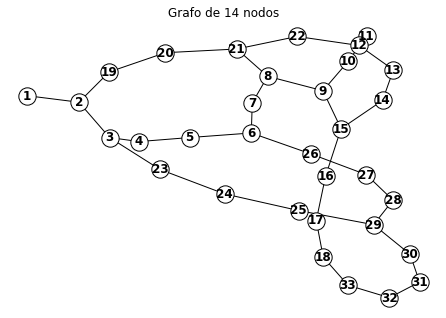

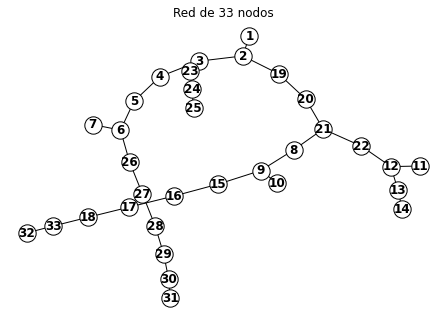

1 - 2, 2 - 3, 3 - 4, 4 - 5, 5 - 6, 6 - 7, 8 - 9, 9 - 10, 12 - 13, 13 - 14, 15 - 16, 16 - 17, 17 - 18, 2 - 19, 19 - 20, 20 - 21, 21 - 22, 3 - 23, 23 - 24, 24 - 25, 6 - 26, 26 - 27, 27 - 28, 28 - 29, 29 - 30, 30 - 31, 9 - 15, 18 - 33, 12 - 11, 33 - 32, 21 - 8, 22 - 12, 


In [11]:

if m.status == GRB.OPTIMAL or m.status ==GRB.TIME_LIMIT:
    print('Tiempo Corrida: ', m.RunTime)
    # Visulizar el valor de la función objetivo
    print('Costo:', m.objVal)
    
    red=[]
    grafo=[]
    estilo=[]
    for (i, j) in B:
            print(f"y[{i},{j}]: {y[i, j].X}")
            if y[(i,j)].X>=1:
                red.append((i,j))
                estilo.append('solid')
            elif B.index((i,j)) <len(B)/2: 
                estilo.append('dashed')
            if B.index((i,j)) <len(B)/2:    
                grafo.append((i,j))

    G = nx.Graph()
    
    G.add_nodes_from(N)
    
    G.add_edges_from(grafo)
    nx.draw(G, with_labels=True, node_color="white", font_weight='bold', edgecolors='black')
    plt.title("Grafo de 417 nodos")
    plt.show()
    
    G1 = nx.Graph()    
    G1.add_nodes_from(N)
    
    G1.add_edges_from(red)
    nx.draw(G1, with_labels=True, node_color="white", font_weight='bold', edgecolors='black')
    plt.title("Red de 417 nodos")
    plt.show()
    
    p=""
    for i,j in red:
        p+=str(i)+" - "+str(j)+ ", "
    print(p)
else:
    m.computeIIS()
    m.write("modelo417.ilp")

# Tunear

In [12]:
m.tune()
for i in range(m.tuneResultCount):
    m.getTuneResult(i)
m.optimize()
print(m.RunTime)


Solving model using baseline parameter set with TimeLimit=3600s

Testing candidate parameter set 1...

	MIPGap 1e-08
	NonConvex 2

Solving with random seed #1 ...
Optimize a model with 610 rows, 403 columns and 1768 nonzeros
Model fingerprint: 0x9acad92a
Model has 74 quadratic constraints
Variable types: 329 continuous, 74 integer (74 binary)
Coefficient statistics:
  Matrix range     [4e-05, 5e+06]
  QMatrix range    [1e+00, 1e+00]
  Objective range  [6e-03, 1e-01]
  Bounds range     [1e+00, 2e+02]
  RHS range        [1e-03, 2e+02]
Presolve removed 188 rows and 6 columns
Presolve time: 0.01s
Presolved: 422 rows, 397 columns, 1520 nonzeros
Presolved model has 73 quadratic constraint(s)
Variable types: 325 continuous, 72 integer (72 binary)

Root relaxation: objective 0.000000e+00, 121 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0  

# Mejoras en el modelo 

1) Se unificaron las variables I y I^2 con lo que se reduce la cantidad de arcos y se logra una mejora en el tiempo computacional 

2) Se elimina la restricción de que los nodos de referencia no generan ya que con el enfoque utilizado no es necesaria. Con el fin de evitar ciclos en la solución final se añade una nueva restricción.

3) Mediante la optimización de parámetros (tuning) en nuestro modelo computacional, hemos alcanzado una notable mejora en el tiempo de ejecución. Pasamos de 0.17 segundos a tan solo 0.049 segundos, marcando una reducción significativa y eficaz en el tiempo computacional. Este logro destaca la eficiencia de ajustar cuidadosamente los parámetros del modelo, permitiéndonos alcanzar resultados óptimos de manera más rápida y efectiva.